### Stochastic Differential Equations (SDEs)

A Stochastic Differential Equation (SDE) incorporates randomness into its structure, through Brownian motion, $W_t$. The general form of an SDE is:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t $$

- $\mu(X_t, t)$: The drift term.
- $\sigma(X_t, t)$: The diffusion term.
- $W_t$:  Brownian motion.

### Brownian motion ($W_t$) Properties:

1. $W_0 = 0$.
2. $W_t$ has independent increments.
3. $W_t - W_s \sim \mathcal{N}(0, t-s)$ for $t > s$.
4. $W_t$ is almost surely continuous.

### Example: Geometric Brownian Motion (GBM)

GBM is an SDE used to model stock prices, given by:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

- $S_t$: Stock price at time $t$.
- $\mu$: Expected return rate.
- $\sigma$: Volatility (standard deviation of returns).

Attempting to solve the SDE for Geometric Brownian Motion (GBM) naively:

$$ \frac{dS_t}{S_t} = \mu dt + \sigma dW_t $$

We divide by $S_t$ and integrate both sides from 0 to $T$:

$$ \int_0^T \frac{dS_t}{S_t} = \mu \int_0^T dt + \sigma \int_0^T dW_t $$

This leads to:

$$ \ln\left(\frac{S_T}{S_0}\right) = \mu T + \sigma W_T $$

Solving for $S_T$ gives:

$$ S_T = S_0 e^{\mu T + \sigma W_T} $$

### Critical Mistake:

We assumed $d\ln\left(S_t\right)=\frac{dS_t}{S_t}$, i.e the normal chain rule can apply to stochastic calculus, but this is wrong!


### Ito's lemma (A Stochastic Chain Rule)

Consider an Itô process $X_t$ governed by:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t$$

where $B_t$ is a Wiener process. Consider a fucntion $f(t, x)\in C^{(1,2)}$, the Taylor expansion is:

$$ df = \frac{\partial f}{\partial t} dt + \frac{1}{2} \frac{\partial^2 f}{\partial t^2} dt^2 + \cdots + \frac{\partial f}{\partial x} dx + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} dx^2 + \cdots $$

Substituting $X_t$ for $x$ and $\mu(X_t, t) dt + \sigma(X_t, t) dW_t$ for $dx$, we get:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} (\mu(X_t, t) dt + \sigma(X_t, t) dW_t) + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} (\mu^2(X_t, t) dt^2 + 2\mu(X_t, t) \sigma(X_t, t) dt dW_t +\sigma^2(X_t, t) dW_t^2) + \cdots $$

As $dt \rightarrow 0$, terms involving $dt^2$ and $dt dW_t$ vanish faster than those involving $dW_t^2$, which scales as $O(dt)$.The equation simplifies to:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$


### Stochastic vs. Deterministic Chain Rule

For a deterministic function $X_t$, applying the chain rule to a twice-differentiable function $f(t, x)$ yields:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} \frac{dX_t}{dt} dt $$

Given a deterministic process $dX_t = \mu(X_t, t) dt +\sigma(X_t, t) dt$, the differential $df$ for $f(t, X_t)$ is:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} \right) dt +\sigma(X_t, t)\frac{\partial f}{\partial x} dt $$


### Stochastic Case with Itô's Lemma

For a stochastic process $X_t$ governed by $dX_t = \mu(X_t, t) dt + \sigma_t dW_t$, Itô's lemma provides the differential $df$:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$

### Contrast and Interpretation

- **Additional Term**: The term $\frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} dt$ in the stochastic case arises from the quadratic variation of the Wiener process, $dW_t^2 = dt$, a property nonexistent in deterministic calculus.

### Correct Solution for GBM using Itô's Lemma

Consider the Geometric Brownian Motion (GBM) described by the SDE:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

Here, $\mu$ represents the constant drift rate, and $\sigma$ represents the constant volatility. The term $S_t$ signifies the stock price at time $t$.

To apply Itô's Lemma, we select a function $f(t, S_t)$ to transform the SDE. Choosing $f(t, S_t) = \ln(S_t)$, we proceed as follows:

#### Step 1: Compute Partial Derivatives of $f$

For $f(t, S_t) = \ln(S_t)$:

- $\frac{\partial f}{\partial t} = 0$ since $f$ does not explicitly depend on $t$.
- $\frac{\partial f}{\partial S_t} = \frac{1}{S_t}$
- $\frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2}$

#### Step 2: Apply Itô's Lemma to $f(t, S_t)$

Itô's Lemma gives:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(S_t, t) \frac{\partial f}{\partial S_t} + \frac{ \sigma^2(S_t, t)}{2} \frac{\partial^2 f}{\partial S_t^2} \right) dt +  \sigma(S_t, t) \frac{\partial f}{\partial S_t} dW_t $$

- Note: In this context, $\mu(S_t, t) = \mu S_t$ and $ \sigma(S_t, t) = \sigma S_t$, reflecting the GBM dynamics.

Substituting the derivatives and terms:

$$ d(\ln(S_t)) = \left( 0 + \mu S_t \cdot \frac{1}{S_t} - \frac{(\sigma S_t)^2}{2} \cdot \frac{1}{S_t^2} \right) dt + \sigma S_t \cdot \frac{1}{S_t} dW_t $$

Simplifying, we get:

$$ d(\ln(S_t)) = \left( \mu - \frac{\sigma^2}{2} \right) dt + \sigma dW_t $$

#### Step 3: Integrate and Solve for $S_T$

Integrating from $0$ to $T$:

$$ \ln\left(\frac{S_T}{S_0}\right) = \left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T $$

Solving for $S_T$:

$$ S_T = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T} $$



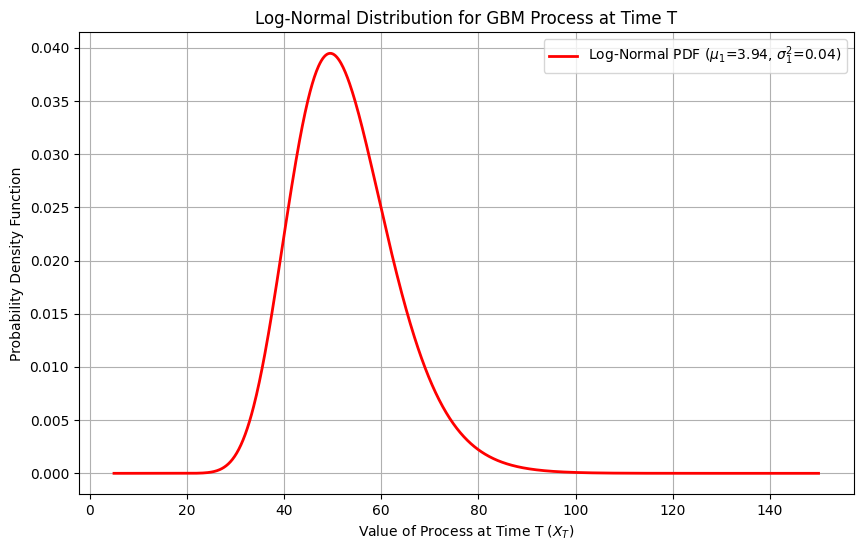

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t):
    """
    Plot the log-normal distribution for a GBM process at time T.

    Parameters:
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between T and t.
    """
   
    # Calculate the parameters of the log-normal distribution
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)

    # Generate values for the x-axis
    x = np.linspace(X_t * 0.1, X_t * 3, 1000)  

    # Calculate the log-normal distribution
    pdf = (1 / (x * sigma_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu_1) / sigma_1) ** 2)

    # Plot the log-normal distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'r-', lw=2, label=f'Log-Normal PDF ($\mu_1$={mu_1:.2f}, $\sigma_1^2$={sigma_1**2:.2f})')
    plt.title('Log-Normal Distribution for GBM Process at Time T')
    plt.xlabel('Value of Process at Time T ($X_T$)')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the parameters of the GBM process
X_t = 50  
mu = .05  
sigma = .2  
T_minus_t = 1  

plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t)

### Derivation Outline:

1. **Portfolio Construction:**
   Construct a portfolio $\Pi$ consisting of one short option (put or call) and $\Delta$ units of the underlying asset:

   $$ \Pi = -V + \frac{dV}{dS} S $$

   where $V(S_t, t)$ is the option value, and $S$ is the asset price.

2. **Portfolio Dynamics:**
   The change in portfolio value over an infinitesimally small time $dt$ is:

   $$ d\Pi = -dV + \frac{dV}{dS} dS $$

3. **Option Price Dynamics:**
   By Ito's lemma, we have

   $$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t $$

4. **Asset Price Dynamics:**
   We assume underlying asset follows geometric Brownian motion:

   $$ dS = \mu S dt + \sigma S dW_t $$

   i.e. $\mu(S_t, t)=\mu S$ and $\sigma(S_t, t)=\sigma S$

5. **Substituting and Simplifying:**
   Substitute $dV$  into $d\Pi$ and $\mu S dt + \sigma S dW_t$ for $dS$ leading to:

  $$
  d\Pi = -\left(\left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW_t \right) + \frac{dV}{dS} (\mu S dt + \sigma S dW_t).
  $$
  
  Simplifying we get:

$$ d\Pi = \left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
   

6. **Risk Free Assumption**
Since all risk has vanished from our equation we assume
$$d\Pi =r\Pi  dt =r \left( -V + \frac{dV}{dS} S \right) dt$$
where $r$ is the risk free rate. 

7. **Putting it all Together**
We have thus: 
$$r \left( -V + \frac{dV}{dS} S \right) dt=\left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
and after simplifying, we get the Black Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$


### Black-Scholes Formula for a European Call and Put Option

The price of a European call option $C$ is given by:

$$ c(t) = S(t) \cdot N(d_1) - e^{-r(T-t)} K\cdot N(d_2) $$


Similarly, the price of a European put option $p(t)$ is given by:

$$ p(t) = e^{-r(T-t)} K \cdot N(-d_2) - S(t) \cdot N(-d_1) $$


where:

- $S(t)$: Stock price at time $t$
- $K$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $N(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / K) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns


In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European call option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the call option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European put option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the put option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    put_price = -(S0 * norm.cdf(-d1)) + (X * np.exp(-r * T) * norm.cdf(-d2))
    return put_price

# Given data
S0 = 50    # Current stock price
X = 50       # Strike price
T = 0.5      # Time to expiration in years
r = 0.01   # Risk-free interest rate 
sigma = 0.10 # Volatility of the stock 

# Calculate the call option price
call_option_price = black_scholes_call(S0, X, T, r, sigma)
put_option_price = black_scholes_put(S0, X, T, r, sigma)
call_option_price, put_option_price

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def plot_option_price(K=100, T=1, r=0.05, sigma=0.2):
    S = np.linspace(50, 150, 100)  # Stock price range
    prices = black_scholes_call(S, K, T, r, sigma)
    
    # Payoff at time T for a call option
    payoff = np.maximum(S - K, 0)

    plt.figure(figsize=(10, 6))
    
    # Plotting the Black-Scholes Call Option Price
    plt.plot(S, prices, label='Call Option Price')
    
    # Plotting the Payoff at time T
    plt.plot(S, payoff, label='Payoff at T', linestyle='--', color='red')
    
    plt.xlabel('Stock Price')
    plt.ylabel('Value')
    plt.title('Black-Scholes Call Option Price and Payoff at T')
    plt.legend()
    plt.grid(True)
    
    # Fixing the x and y axes
    plt.xlim([50, 150])
    plt.ylim([0, max(max(prices), max(payoff)) + 10])
    
    plt.show()

interact(plot_option_price, K=(50,150,5), T=(0.01,2,0.01), r=(0,0.1,0.01), sigma=(0.01,1,0.01))


interactive(children=(IntSlider(value=100, description='K', max=150, min=50, step=5), FloatSlider(value=1.0, d…

<function __main__.plot_option_price(K=100, T=1, r=0.05, sigma=0.2)>

### Introduction to the Greeks

The Greeks measure the sensitivity of option prices to various factors. 

#### Delta ($\Delta=\frac{\partial V}{\partial S}$)
- Measures the rate of change of the option price with respect to changes in the underlying asset's price.
- For call options: $\Delta = N(d_1)$
- For put options: $\Delta = N(d_1) - 1$

#### Gamma ($\Gamma=\frac{\partial^2 V}{\partial S^2}$)
- Measures the rate of change in Delta with respect to changes in the underlying asset's price.
- $\Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T-t}}$

#### Theta ($\Theta=-\frac{\partial V}{\partial \tau} $) $(\tau:=T-t)$
- Measures the rate of change of the option price with respect to time (time decay).
- Call options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} - r X e^{-r(T-t)} N(d_2)$
- Put options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} + r X e^{-r(T-t)} N(-d_2)$

#### Vega ($\nu=\frac{\partial V}{\partial \sigma}$)
- Measures the rate of change of the option price with respect to volatility of the underlying asset.
- $\nu = S \sqrt{T-t} N'(d_1)$

#### Rho ($\rho=\frac{\partial V}{\partial r}$)
- Measures the rate of change of the option price with respect to the risk-free interest rate.
- For call options: $\rho = (T-t) X e^{-r(T-t)} N(d_2)$
- For put options: $\rho = -(T-t) X e^{-r(T-t)} N(-d_2)$


In [ ]:
from scipy.stats import norm
import numpy as np

def european_call_price_and_greeks(S, X, T, r, sigma):
    """
    Calculate the price and Greeks for a European call option.

    Parameters:
    S (float): Current stock price
    X (float): Strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock

    Returns:
    tuple: Option price, Delta, Gamma, Theta, Vega, Rho
    """
    # Calculate d1 and d2
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the call option
    price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

    # Calculate Greeks
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * X * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = T * X * np.exp(-r * T) * norm.cdf(d2)

    return price, delta, gamma, theta, vega, rho

# Example usage
S0 = 100  # Current stock price
X = 100   # Strike price
T = 1    # Time to expiration (1 year)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of the stock

price, delta, gamma, theta, vega, rho = european_call_price_and_greeks(S0, X, T, r, sigma)
print(f"Call Price: {price:.2f}, Delta: {delta:.2f}, Gamma: {gamma:.2f}, Theta: {theta:.2f}, Vega: {vega:.2f}, Rho: {rho:.2f}")


### Self-Financing-Replicating Portfolio with Delta 

This Python code simulates a self-financing delta hedging strategy for a European call option on a stock, demonstrating how to maintain a delta-neutral portfolio through continuous rebalancing. The strategy involves short selling a call option, buying $\Delta$ shares of the underlying stock to hedge, and investing the remaining funds in a risk-free bank account. 


- **Initial Setup**: The portfolio starts with an amount equal to the call option's price. The option is shorted, the corresponding $\Delta$ shares of stock are purchased, and any remaining funds are placed in a risk-free bank account.
- **Delta ($\Delta$)**: Represents the hedge ratio, indicating the number of stock shares needed to hedge against the price movement of one option contract. Calculated using the Black-Scholes model.
- **Rebalancing**: At each time step, the stock position is adjusted to the new $\Delta$, ensuring the portfolio remains delta-neutral. The adjustment is financed by the change in the option's value, keeping the strategy self-financing.




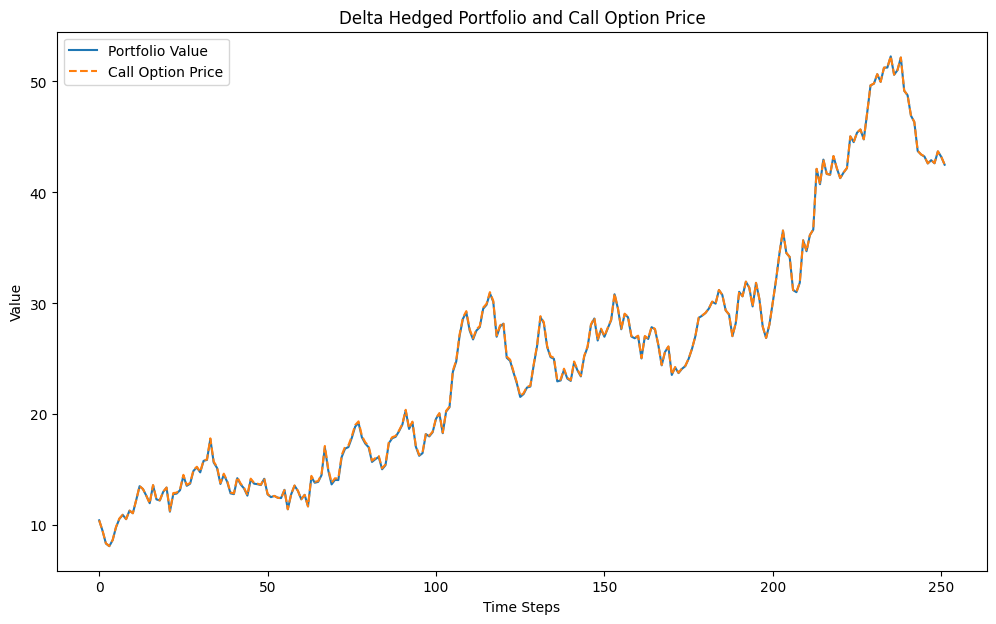

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.where(T <= 0, np.maximum(S-K, 0), S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = np.where(T <= 0, 1.0 * (S > K), norm.cdf(d1))
    return delta

# Parameters
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
dt, N = 1/252, int(T / (1/252))

# Simulate stock path
stock_price_changes = (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N-1)
S = S0 * np.exp(np.cumsum(np.insert(stock_price_changes, 0, 0)))

# Time to maturity for each step
T_remaining = T - np.arange(N) * dt

# Calculate option prices and delta
call_prices = black_scholes_call(S, K, T_remaining, r, sigma)
D = delta_call(S, K, T_remaining, r, sigma)

# Calculate stock investment based on delta
stock_investment = D * S

# Initialize bank investment and portfolio value arrays
bank_investment = np.zeros(N)
Pi = np.zeros(N)

# Initial bank investment and portfolio value
bank_investment[0] = call_prices[0] - stock_investment[0]
Pi[0] = bank_investment[0] + stock_investment[0] - call_prices[0]

# Update bank investment and portfolio value for each step
for t in range(1, N):
    bank_investment[t] = bank_investment[t-1] * np.exp(r * dt) - (stock_investment[t] -D[t-1]*S[t])

# Calculate portfolio value
Pi = bank_investment  + stock_investment #- call_prices

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(Pi, label='Portfolio Value')
plt.plot(call_prices, label='Call Option Price', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Delta Hedged Portfolio and Call Option Price')
plt.legend()
plt.show()

### Delta-Gamma Hedging Strategy Overview

This code implements a Delta-Gamma hedging strategy for a European call option using simulated stock prices.
We conduct our delta gamma hedge for the call option using the underlying stock and an option expiring 1 additonal year  in the future.

#### Hedge Components:
- **Option Pricing**: Black-Scholes model for call prices, Delta ($\Delta$), and Gamma ($\Gamma$).
- **Portfolio**: $\Pi = -V + A \cdot S + B \cdot \text{Option}$

#### Mathematical Setup:
1. **Delta Neutrality**: $\frac{d\Pi}{dS} = 0 \Rightarrow A = \Delta - B \cdot \Delta_{\text{option}}$
2. **Gamma Neutrality**: $\frac{d^2\Pi}{dS^2} = 0 \Rightarrow B = \frac{\Gamma}{\Gamma_{\text{option}}}$

#### Execution:
- Simulate $S$ using geometric Brownian motion.
- Calculate $\Delta$, $\Gamma$ for the portfolio and auxiliary option.
- Solve for $A$ and $B$ to maintain neutrality.
- Update portfolio value: $\Pi$.

#### Result:
- Plots portfolio value ($\Pi$) and call option price over time.


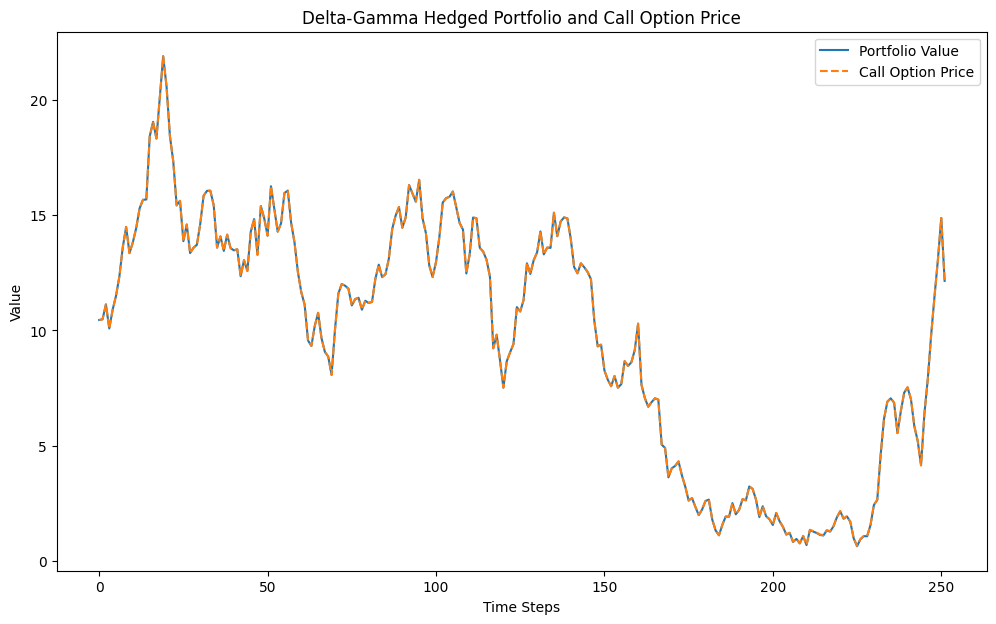

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.where(T <= 0, np.maximum(S-K, 0), S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = np.where(T <= 0, 1.0 * (S > K), norm.cdf(d1))
    return delta

def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = np.where(T <= 0, 0, norm.pdf(d1) / (S * sigma * np.sqrt(T)))
    return gamma

# Parameters
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
dt, N = 1/252, int(T / (1/252))

# Simulate stock path
stock_price_changes = (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N-1)
S = S0 * np.exp(np.cumsum(np.insert(stock_price_changes, 0, 0)))

# Time to maturity for each step
T_remaining = T - np.arange(N) * dt

# Calculate option prices and Greeks
call_prices = black_scholes_call(S, K, T_remaining, r, sigma)
option_prices = black_scholes_call(S, K, T_remaining + 1, r, sigma)
D = delta_call(S, K, T_remaining, r, sigma)
G = gamma_call(S, K, T_remaining, r, sigma)
D_option = delta_call(S, K, T_remaining + 1, r, sigma)
G_option = gamma_call(S, K, T_remaining + 1, r, sigma)

# Calculate A, B, stock, option, and bank investments
B = G / G_option
A = D - B * D_option
option_investment = B * option_prices
stock_investment = A * S
bank_investment = np.zeros(N)
bank_investment[0] = call_prices[0] - stock_investment[0] - option_investment[0]

# Update bank investment for each step
for t in range(1, N):
    bank_investment[t] = bank_investment[t-1] * np.exp(r * dt) - (stock_investment[t] - A[t-1] * S[t]) - (option_investment[t] - B[t-1] * option_prices[t])

# Calculate portfolio value
Pi = bank_investment + option_investment + stock_investment #- call_prices

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(Pi, label='Portfolio Value')
plt.plot(call_prices, label='Call Option Price', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Delta-Gamma Hedged Portfolio and Call Option Price')
plt.legend()
plt.show()

### Does Black-Scholes model the market?

The following table presents a selection of call options for Apple Inc. (AAPL), which is currently trading at $\$189$. These options have an expiration date of January 17, 2025 with $r=5.31\%$ 	

| Strike Price | Current Price | 
|--------------|------------|
| $165.00      | $36.56     | 
| $170.00      | $32.97     | 
| $175.00      | $29.73     | 
| $180.00      | $25.75     | 
| $185.00      | $22.70     |
| $190.00      | $19.86     | 
| $195.00      | $17.00     |
| $200.00      | $14.50     | 
| $205.00      | $12.61     | 
| $210.00      | $10.23     | 

In [31]:
from datetime import datetime
def calculate_days_to_expiration(current_date, expiration_date):
    """
    Calculate the number of days from the current date to the expiration date.

    Parameters:
    current_date (str): Current date in the format 'YYYY-MM-DD'
    expiration_date (str): Expiration date in the format 'YYYY-MM-DD'

    Returns:
    int: Number of days from the current date to the expiration date
    """
    # Convert strings to datetime objects
    current_date = datetime.strptime(current_date, '%Y-%m-%d')
    expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d')
    
    # Calculate the difference in days
    days_to_expiration = (expiration_date - current_date).days
    
    return days_to_expiration

current_date = '2024-02-07'  # February 7, 2024
expiration_date = '2025-01-17'  # January 17, 2025
days_to_expiration = calculate_days_to_expiration(current_date, expiration_date)
# Given parameters
S0 = 189  # Current stock price of AAPL
r = 0.0531  # Risk-free interest rate (annualized) Currently # 5.31
T = days_to_expiration / 365  # Time to expiration in years

# Table of options
options = [
    {"Strike Price": 165.00, "Volatility": 20},
    {"Strike Price": 170.00, "Volatility": 20},
    {"Strike Price": 175.00, "Volatility": 20},
    {"Strike Price": 180.00, "Volatility": 20},
    {"Strike Price": 185.00, "Volatility": 20},
    {"Strike Price": 190.00, "Volatility": 20},
    {"Strike Price": 195.00, "Volatility": 20},
    {"Strike Price": 200.00, "Volatility": 20},
    {"Strike Price": 205.00, "Volatility": 20},
    {"Strike Price": 210.00, "Volatility": 20},
]

# Calculate and print the Black-Scholes price for each option
for option in options:
    X = option["Strike Price"]
    sigma = option["Volatility"] / 100  # Convert percentage to decimal
    black_scholes_price = black_scholes_call(S0, X, T, r, sigma)
    print(f"Strike Price: ${X}, Black-Scholes Price: ${black_scholes_price:.2f}")

Strike Price: $165.0, Black-Scholes Price: $35.10
Strike Price: $170.0, Black-Scholes Price: $31.37
Strike Price: $175.0, Black-Scholes Price: $27.88
Strike Price: $180.0, Black-Scholes Price: $24.62
Strike Price: $185.0, Black-Scholes Price: $21.60
Strike Price: $190.0, Black-Scholes Price: $18.85
Strike Price: $195.0, Black-Scholes Price: $16.34
Strike Price: $200.0, Black-Scholes Price: $14.09
Strike Price: $205.0, Black-Scholes Price: $12.08
Strike Price: $210.0, Black-Scholes Price: $10.29
